<h1 style="color:Tomato;" align ='center'>Airtel Stock Price Analysis (Time Series Analysis)</h1>

**<p style='color:DodgerBlue; text-align:center'> Bharti Airtel the only Company which sustained itself in the stream of JIO. In this notebook I am going to discuss in detail about the stock performance of Airtel between 2017 to 2022. We will try to discuss how stock performed during various market crash during this period we will also try to analyze the impact of decisions taken by Airtel.</p>**

<h3 style="color:Tomato;"> In this Notebook We will be Discussing Following Market Crash:</h3>


1. <h5 style='color:DodgerBlue;'>Stock market crash 2018</h5>  2 and 5 February 2018
1. <h5 style='color:DodgerBlue;'>Stock market crash 2020</h5>  1 February 2020 (Budget) and 28 February 2020 (Covid)

<h4 style="color:Tomato;"> And will also Discuss few business decisions which impacted stock price.</h4>

<h3 style="color:Tomato;"> Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline

<h3 style="color:Tomato;"> Reading Data</h3>

In [2]:
df = pd.read_csv('../input/bharti-airtel-stock-proce/BHARTIARTL.NS.csv')

<h5 style='color:DodgerBlue;'>Data is from 28th Feb 2017 to 25th Feb 2022</h5> 

<h3 style="color:Tomato;"> Basic EDA</h3>



<p style='color:DodgerBlue;'> Here our aim is to ask some basic question to data which we ask while EDA.</p>

**1. Shape of Data**

In [3]:
df.shape

(1236, 7)

**Which are the 7 Different Columns**

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**How our data looks**

In [5]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-28,327.789673,342.572357,327.23877,335.272827,326.374084,13239646
1,2017-03-01,338.394623,338.670105,331.87558,333.069214,324.228943,3755896


In [6]:
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
363,2018-08-13,338.716003,345.005524,333.298737,339.863708,335.918610,4157716
855,2020-08-19,529.000000,539.900024,527.099976,535.849976,535.849976,17074711
535,2019-05-03,324.450012,333.850006,324.450012,331.450012,330.285889,9718936
871,2020-09-10,508.000000,508.000000,491.200012,497.350006,497.350006,21005683
1006,2021-03-25,523.400024,523.650024,499.549988,507.750000,507.750000,17248482


In [7]:
df.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1234,2022-02-24,682.0,688.549988,645.450012,670.900024,670.900024,14139461
1235,2022-02-25,677.5,695.150024,677.500000,688.650024,688.650024,6452099


**Checking Datatypes of data**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


**<p style='color:DodgerBlue;'> Date Columns should be in Datetime format to perform Time Series Analysis.</p>**

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1236 non-null   datetime64[ns]
 1   Open       1236 non-null   float64       
 2   High       1236 non-null   float64       
 3   Low        1236 non-null   float64       
 4   Close      1236 non-null   float64       
 5   Adj Close  1236 non-null   float64       
 6   Volume     1236 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


*We are going to set Date as the index for the further Visualizations*

In [11]:
df_1 = df.set_index('Date')

In [12]:
df_1.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-21,336.420563,338.073273,334.676025,337.246918,328.295807,2891476
2018-11-21,303.917053,311.675659,303.136597,305.477936,304.405029,9233430
2019-06-06,352.799988,355.950012,348.500000,353.799988,352.557373,10317108
2020-03-13,453.799988,509.049988,420.000000,491.850006,490.122528,23807314
2017-06-28,344.225067,350.422760,337.430542,346.336884,337.144470,4132340


**Let's Plot the first Plot on this data and see what we get**

<AxesSubplot:xlabel='Date'>

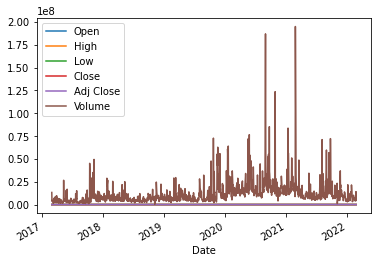

In [13]:
df_1.plot()

> **oops ! not that good.**

Will try to plot one by one.

<h3 style="color:Tomato;"> Overall Performance of Airtel over the span of 5 Years</h3>

Text(0.5, 1.0, 'AIRTEL Stock Price - 5Y')

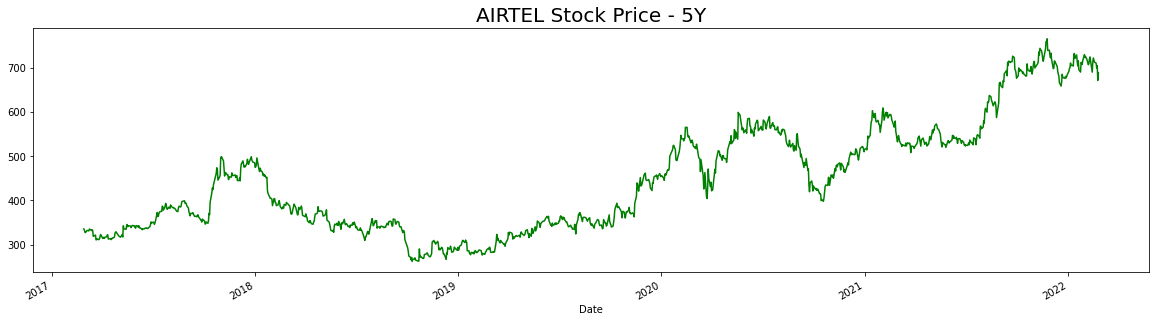

In [14]:
df_1['Close'].plot(figsize=(20,5), color = 'g')
plt.title('AIRTEL Stock Price - 5Y', fontsize = 20)

In [15]:
df_1['Rolling 7: 7Days Rolling']= df_1.High.rolling(7).mean()
df_1['Rolling 30: 30Days Rolling']= df_1.High.rolling(30).mean()

[]

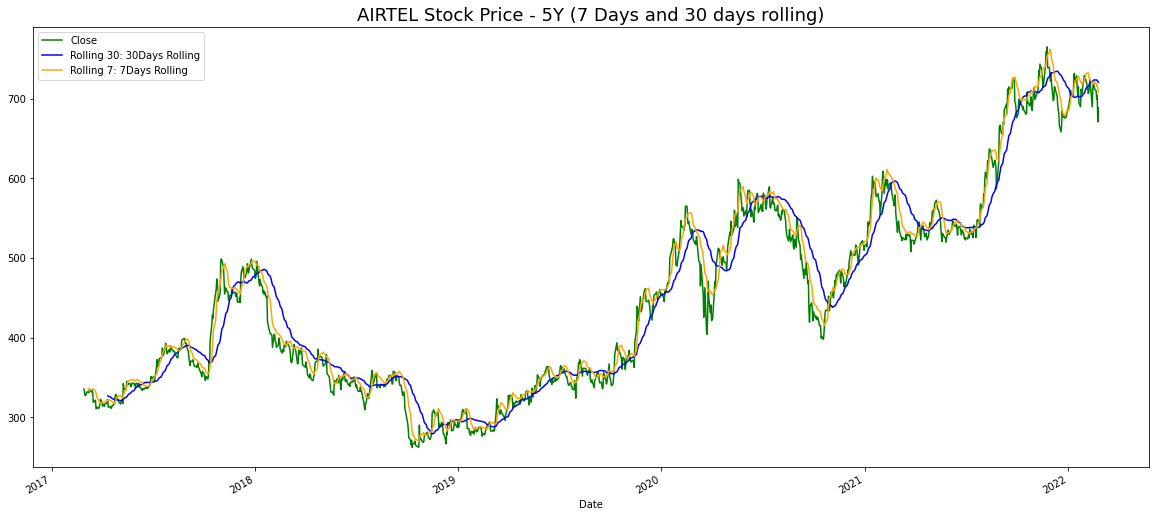

In [16]:
df_1[['Close','Rolling 30: 30Days Rolling','Rolling 7: 7Days Rolling']].plot(figsize=(20,9), color = ['green','blue','orange'])
plt.title('AIRTEL Stock Price - 5Y (7 Days and 30 days rolling)', fontsize = 18)
plt.plot()

<p style='color:DodgerBlue; text-align:center'> The above plot is having 3 Lines Yellow line is showing the 7 days rolling average of closing price and blue line is showing 30 days rolling average of Closing Price</p>

**<p style='color:DodgerBlue; text-align:center'> Overall Conclusion we can draw is that Airtel had shown good growth from 2017 to 2018 but in 2018 it had taken a sharp dip which healed gradually over 2019 and BHARTI AIRTEL was at their all time high in the Q3 of 2021.</p>**

<h3 style="color:Tomato;"> Airtel Stock Prizes in Last 20 days</h3>

Text(0.5, 1.0, 'Airtel Stock Price in last 20 Days')

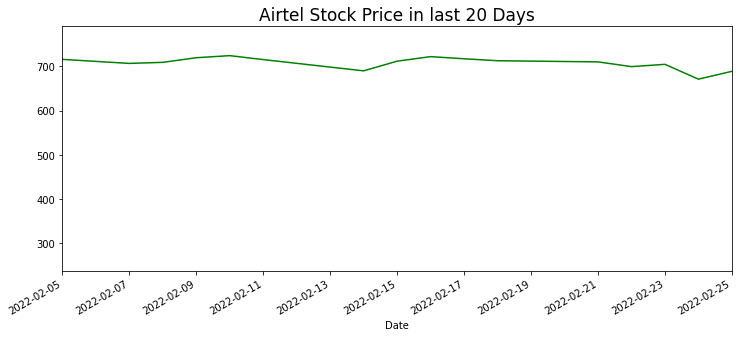

In [17]:
df_1['Close'].plot(xlim=['2022-02-05','2022-02-25'],figsize=(12,5),color='g')
plt.title('Airtel Stock Price in last 20 Days', fontsize = 17)

**In Last 20 Days we can say the price is quite stable.**

<h2 style="color:Tomato;"> Let's Discuss the Market Crashes Now.</h2>

<h4 style="color:Tomato;"> 1. Stock Market Crash 2018</h4>

**2nd April 2007 to 17th December 2007 was the period during which the market was under shock due to ongoing Financial Crisis.**

Text(0.5, 1.0, 'Airtel in 2018 Crash')

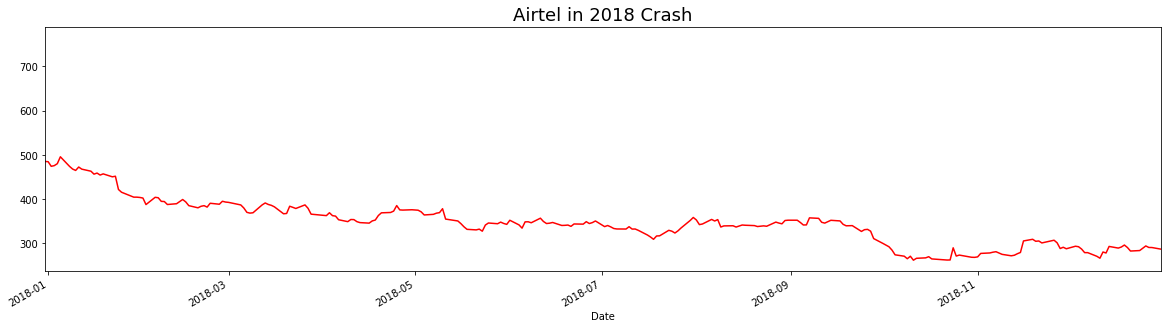

In [18]:
df_1['Close'].plot(xlim=['2017-12-31','2018-12-31'],figsize=(20,5),color='r')
plt.title('Airtel in 2018 Crash', fontsize =18)

<p style='color:DodgerBlue; text-align:center'>Finance minister's proposal in the budget speech to introduce a 10% long term capital gains tax (LTCG) on equity shares sold after 12 months. This Statement started the Fall in stock market.</p>

**<p style='color:DodgerBlue; text-align:center'>Airtel was not an Exception to this AIRTEL Touched it's low in these five years (17-22) in Fourth week of october We can Say that Airtel was affected by this Crash because the customers of telecom company were opting out.</p>**


[Article on this Crash (Specific to Bharti Airtel)](https://www.business-standard.com/article/markets/bharti-airtel-hits-52-week-low-stock-falls-35-in-thus-far-2018-118071600397_1.html)

**How Stocks behaved after Crash**

Text(0.5, 1.0, 'Airtel After 2018 Crash (for next 1 year)')

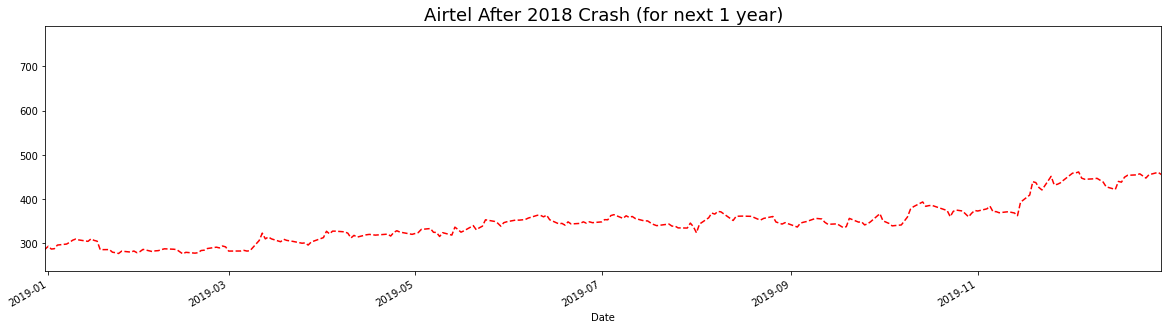

In [19]:
df_1['Close'].plot(xlim=['2018-12-31','2019-12-31'],figsize=(20,5),color='r', ls='dashed')
plt.title('Airtel After 2018 Crash (for next 1 year)', fontsize =18)

**We can clearly see the Stocks managed to level up even after the crash**

<h4 style="color:Tomato;"> 2. Stock Market Crash 2020</h4>

#### How Airtel Performed in 2020 Stock Crash ([Read hear about the crash](https://en.wikipedia.org/wiki/2020_stock_market_crash))

> On 20 February 2020, stock markets across the world suddenly crashed after growing instability due to the COVID-19 pandemic. It ended on 7 April 2020.


Text(0.5, 1.0, 'Airtel Stock Price in 2020  Market Crash')

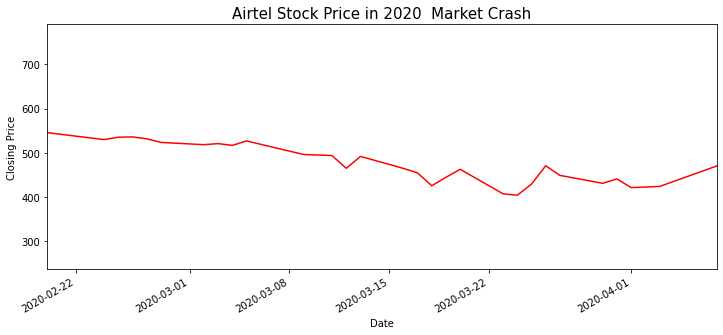

In [20]:
df_1['Close'].plot(xlim=['2020-02-20','2020-04-07'],figsize=(12,5),color='r')
plt.ylabel('Closing Price')
plt.title('Airtel Stock Price in 2020  Market Crash', fontsize=15)

Text(0.5, 1.0, 'Airtel Stock Price in 2020  Market Crash (Weekly)')

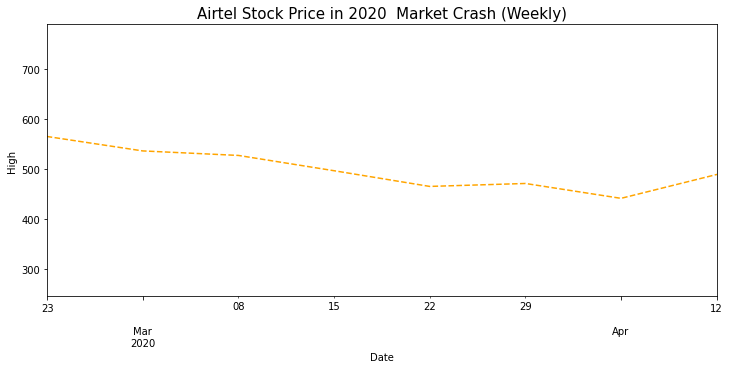

In [21]:
df_1.resample(rule='W').max()['Close'].plot(xlim=['2020-02-20','2020-04-07'],figsize=(12,5),color='Orange',ls='dashed')
plt.ylabel('High')
plt.title('Airtel Stock Price in 2020  Market Crash (Weekly)', fontsize=15)

> **Airtel was not the Exception from the Stocks that were Hampered in 2020 Crash.**

> Airtel's Stock prices dropped from over 675 to 500

<h2 style="color:Tomato;">Effect of recent price Hike.</h2>

<p style='color:DodgerBlue; text-align:center'>On 26th Nov 2021 Airtel and other tecom companies had announced the price hike of 20-25% across there prepaid plans let's discuss how this was reflected on share market.</p>

Text(0.5, 1.0, 'Effect During plan Price Hike')

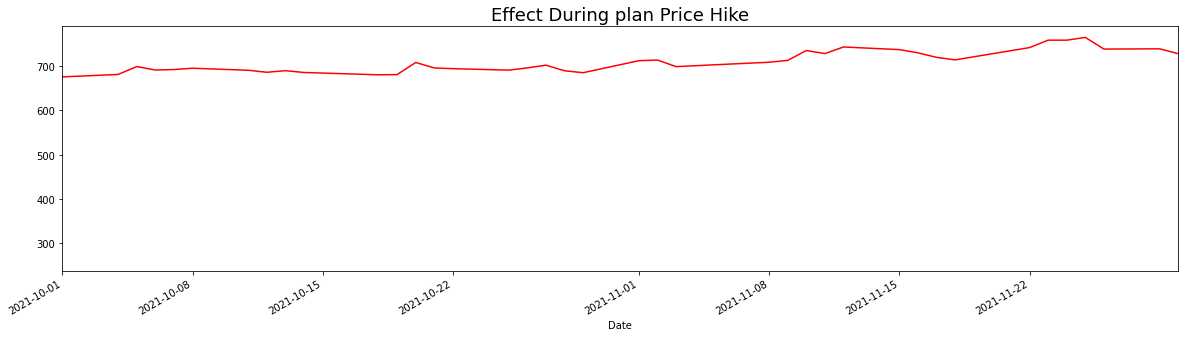

In [22]:
df_1['Close'].plot(xlim=['2021-10-01','2021-11-30'],figsize=(20,5),color='r')
plt.title('Effect During plan Price Hike', fontsize =18)

**<p style='color:DodgerBlue; text-align:center'>This was all time high !!</p>**

In [23]:
df_1.loc['2021-11-15':'2021-11-30']

,Open,High,Low,Close,Adj Close,Volume,Rolling 7: 7Days Rolling,Rolling 30: 30Days Rolling
Date,,,,,,,,
2021-11-15,740.000000,746.000000,736.200012,737.549988,737.549988,5454742,729.107143,710.738332
2021-11-16,741.349976,742.049988,727.049988,730.299988,730.299988,4639931,734.428571,712.561666
2021-11-17,724.549988,732.349976,716.250000,720.049988,720.049988,8002927,736.921422,714.099998
2021-11-18,720.599976,723.450012,708.000000,714.349976,714.349976,4469597,737.921422,714.766665
2021-11-22,740.000000,755.950012,733.099976,742.099976,742.099976,36884348,740.485709,716.366665
2021-11-23,745.000000,761.000000,735.700012,758.900024,758.900024,18240414,743.685713,718.326664
2021-11-24,764.000000,781.799988,756.250000,758.900024,758.900024,21653712,748.942854,721.068331
2021-11-25,759.049988,768.500000,752.799988,765.150024,765.150024,8483653,752.157139,723.483331
2021-11-26,763.000000,763.000000,733.099976,738.750000,738.750000,11142921,755.149998,725.636664


**<p style='color:DodgerBlue; text-align:center'>On 25th Nov 2021 one day before the announcement Airtel touched their all time High.</p>**

# Thank You !